## Setup

In [ ]:
import os

# Get and print current working directory
cwd = os.path.dirname(os.getcwd())
print("Current working directory:", cwd)

# Define output path
output_dir = os.path.join(cwd, "data", "aoi")


Current working directory: d:\natcap\invest-mental-health


In [3]:
import geopandas as gpd
import pandas as pd

# Load shapefiles
dir_msa   = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/UAC/cb_2020_us_cbsa_500k/cb_2020_us_cbsa_500k.shp'
dir_metdiv= 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/UAC/cb_2020_us_metdiv_500k/cb_2020_us_metdiv_500k.shp'
dir_aoi   = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/cb_2020_us_ua20_500k/cb_2020_us_ua20_500k.shp'
dir_tract = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/cb_2020_us_tract_500k/cb_2020_us_tract_500k.shp'
dir_bg    = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/cb_2019_us_bg_500k/cb_2019_us_bg_500k.shp'

ua = gpd.read_file(dir_aoi)
tracts = gpd.read_file(dir_tract)
bg = gpd.read_file(dir_bg)



## MSA 

In [7]:
cbsa   = gpd.read_file(dir_msa)
metdiv = gpd.read_file(dir_metdiv)

### filter metro area

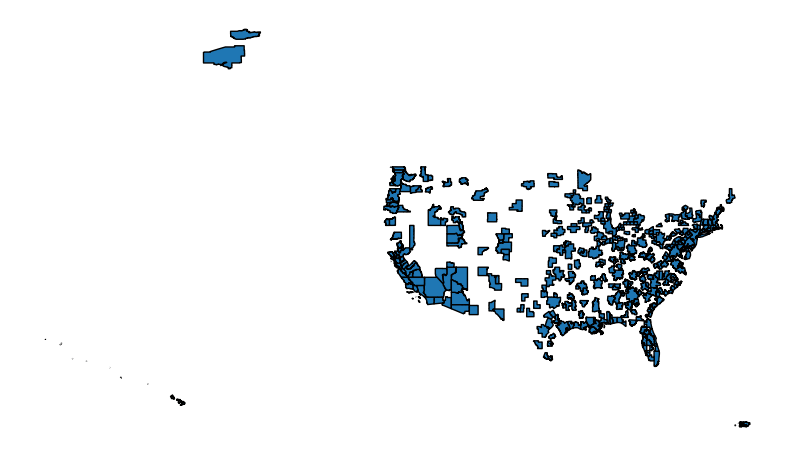

Index(['CSAFP', 'CBSAFP', 'AFFGEOID', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
Index(['CSAFP', 'CBSAFP', 'AFFGEOID', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
(392, 10)
(31, 10)
(423, 10)


In [25]:
cbsa_met = cbsa[cbsa['NAMELSAD'].str.contains('Metro')]
metdiv_met = metdiv[metdiv['NAMELSAD'].str.contains('Metro')]
metdiv_met = metdiv_met.drop('METDIVFP', axis=1)


# Plot 
import matplotlib.pyplot as plt
cbsa_met.plot(edgecolor='black', figsize=(10, 10))
plt.axis("off")
plt.show()


print(cbsa_met.columns)
print(metdiv_met.columns)


# Combine them by rows
metro_combined = gpd.GeoDataFrame(pd.concat([cbsa_met, metdiv_met], ignore_index=True), crs=cbsa_met.crs)


print(cbsa_met.shape)
print(metdiv_met.shape)
print(metro_combined.shape)

### save combined MSA

In [26]:
# Save shapefile
output_path = os.path.join(output_dir, "cb_2020_us_metro_combined.shp")
metro_combined.to_file(output_path)
print(f"Shapefile saved to:\n\t {output_path}")

Shapefile saved to:
	 d:\natcap\invest-mental-health\data\aoi\cb_2020_us_metro_combined.shp


### filter cities and plot

(4, 10)
    CSAFP CBSAFP             AFFGEOID       GEOID  \
115   488  41860       310M600US41860       41860   
157   348  31080       310M600US31080       31080   
404   348  31080  314M600US3108031084  3108031084   
420   488  41860  314M600US4186041884  4186041884   

                                         NAME  \
115        San Francisco-Oakland-Berkeley, CA   
157        Los Angeles-Long Beach-Anaheim, CA   
404       Los Angeles-Long Beach-Glendale, CA   
420  San Francisco-San Mateo-Redwood City, CA   

                                              NAMELSAD LSAD        ALAND  \
115      San Francisco-Oakland-Berkeley, CA Metro Area   M1   6398174793   
157      Los Angeles-Long Beach-Anaheim, CA Metro Area   M1  12566940582   
404  Los Angeles-Long Beach-Glendale, CA Metro Divi...   M3  10513491099   
420  San Francisco-San Mateo-Redwood City, CA Metro...   M3   1283429125   

         AWATER                                           geometry  
115  2475529965  MULTIPOLYGON 

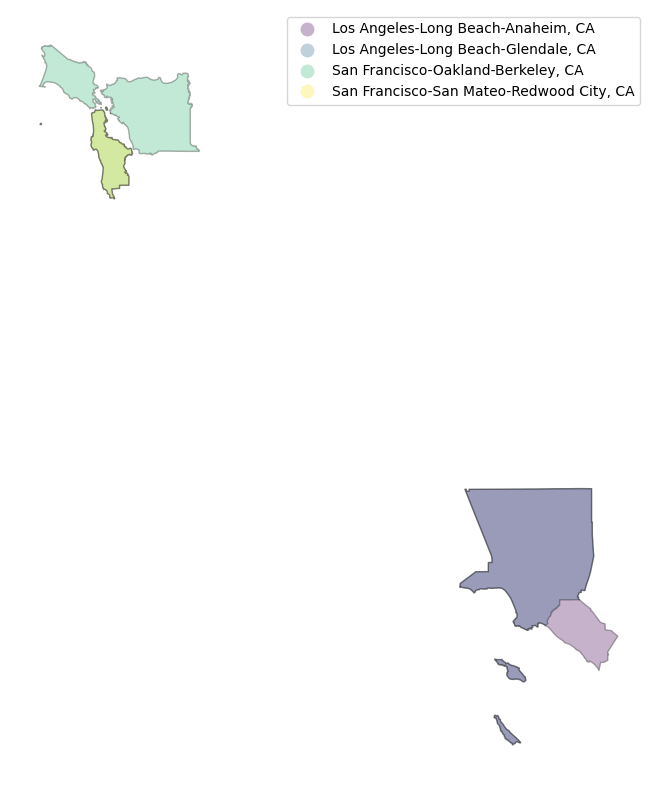

In [ ]:
# Filter cities
cities = ["San Francisco",  "Los Angeles"]
met_i = metro_combined[metro_combined['NAME'].str.contains('|'.join(cities))]

print(met_i.shape)
print(met_i)


# Plot 
import matplotlib.pyplot as plt
met_i.plot(
    column='NAME',   # Replace with your actual column name
    cmap='viridis', 
    alpha=0.3, 
    edgecolor='black', 
    legend=True,
    figsize=(10, 10))
plt.axis("off")
plt.show()


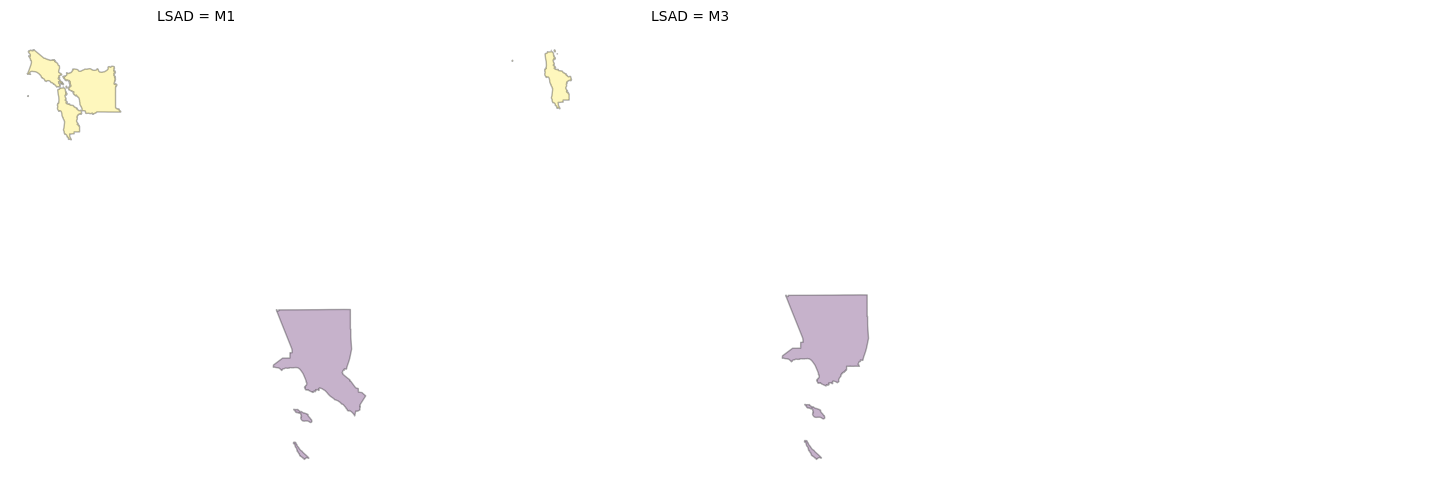

In [23]:
import matplotlib.pyplot as plt

# Group the GeoDataFrame by column 'B'
groups = met_i.groupby('LSAD')

# Set up the figure with subplots
n = len(groups)
ncols = 3  # You can adjust columns per row
nrows = -(-n // ncols)  # Ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each group
for ax, (name, group) in zip(axes, groups):
    group.plot(
        column='NAME', 
        cmap='viridis', 
        alpha=0.3, 
        edgecolor='black', 
        legend=False,  # Skip individual legends for clarity
        ax=ax
    )
    ax.set_title(f'LSAD = {name}', fontsize=10)
    ax.axis('off')

# Turn off any unused axes
for ax in axes[len(groups):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Urban Area

In [2]:

print(ua.columns)


# Filter cities
cities = ["San Francisco", "San Antonio", "Los Angeles", "Minneapolis", "Seattle", "Pittsburgh"]
ua_i = ua[ua['NAME20'].str.contains('|'.join(cities))]


Index(['UACE20', 'AFFGEOID20', 'GEOID20', 'NAME20', 'NAMELSAD20', 'LSAD20',
       'ALAND20', 'AWATER20', 'geometry'],
      dtype='object')


C:\Users\pc\AppData\Local\Temp\ipykernel_35412\1417146643.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 989 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = gpd.overlay(tracts, ua_i, how='intersection')
C:\Users\pc\AppData\Local\Temp\ipykernel_35412\1417146643.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
C:\Users\pc\AppData\Local\Temp\ipykernel_35412\1417146643.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts['tract_area'] = tracts.geometry.area


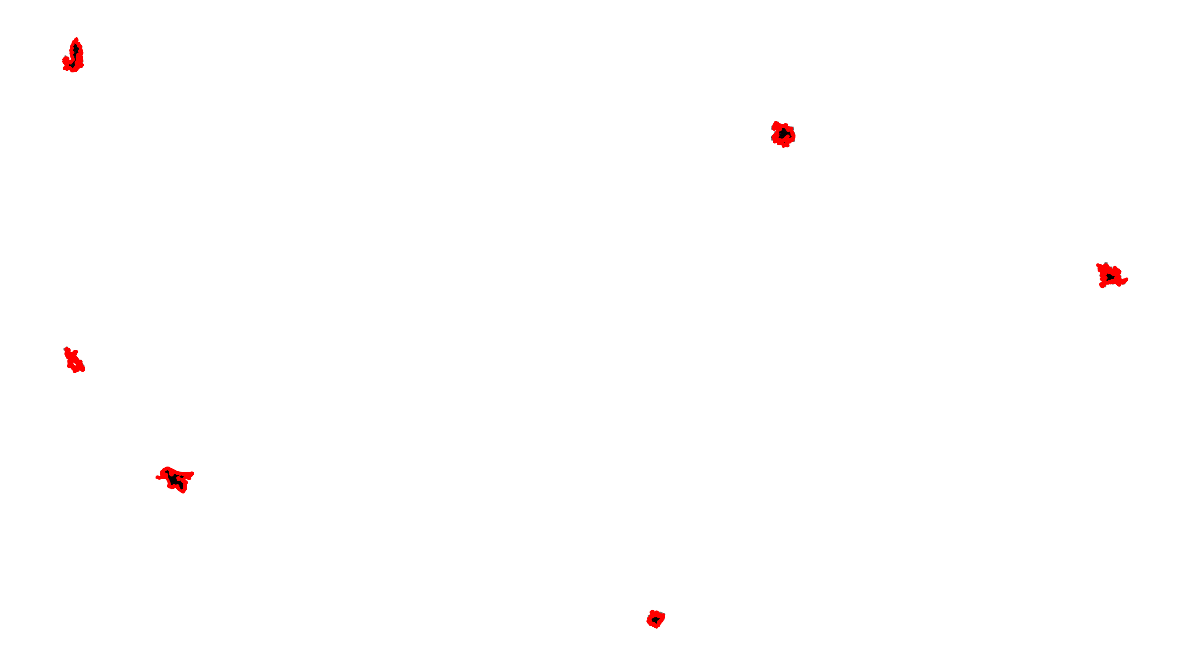

In [3]:

# Spatial Intersection
intersection = gpd.overlay(tracts, ua_i, how='intersection')

# Compute area of intersection
intersection['overlap_area'] = intersection.geometry.area

# Calculate original tract area
tracts['tract_area'] = tracts.geometry.area

# Aggregate overlap area by GEOID
tract_overlap1 = intersection.groupby('GEOID')['overlap_area'].sum().reset_index()

# Join overlap back to original tracts
tract_overlap1 = tracts.merge(tract_overlap1, on='GEOID')
tract_overlap1['overlap_ratio'] = tract_overlap1['overlap_area'] / tract_overlap1['tract_area']

# Filter by overlap ratio
tract_overlap1 = tract_overlap1[tract_overlap1['overlap_ratio'] >= 0.1]

# Second overlap calculation with NAME20
tract_overlap2 = intersection.groupby(['GEOID', 'NAME20'])['overlap_area'].sum().reset_index()
tract_overlap2 = tract_overlap2.merge(tracts.drop(columns='geometry'), on='GEOID')
tract_overlap2['overlap_ratio'] = tract_overlap2['overlap_area'] / tract_overlap2['tract_area']
tract_overlap2 = tract_overlap2[tract_overlap2['overlap_ratio'] >= 0.1]

# Plot using geopandas (similar to ggplot and tmap visualization)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
tract_overlap2_gdf = tracts.merge(tract_overlap2[['GEOID', 'NAME20']], on='GEOID')
tract_overlap2_gdf.plot(column='GEOID', alpha=0.5, edgecolor='k', ax=ax, legend=False)
ua_i.boundary.plot(ax=ax, color='red', linewidth=2)
plt.axis('off')
plt.tight_layout()
plt.show()

# Faceted plots can be done with seaborn/matplotlib or geopandas.explore, but for simplicity, not included here.


### save shp

In [ ]:

# Make sure tract_overlap2 is merged with geometry
tract_overlap1_gdf = tract_overlap2.merge(tracts[['GEOID', 'geometry']], on='GEOID')
tract_overlap1_gdf = gpd.GeoDataFrame(tract_overlap1_gdf, geometry='geometry', crs=tracts.crs)

tract_overlap2_gdf = tract_overlap2.merge(tracts[['GEOID', 'geometry']], on='GEOID')
tract_overlap2_gdf = gpd.GeoDataFrame(tract_overlap2_gdf, geometry='geometry', crs=tracts.crs)


print(tract_overlap2_gdf.shape)


# Save shapefile
output_path = os.path.join(output_dir, "tract_ua_2020_py.shp")
tract_overlap2_gdf.to_file(output_path)
print(f"Shapefile saved to: {output_path}")




(6163, 18)
Current working directory: d:\natcap\invest-mental-health


C:\Users\pc\AppData\Local\Temp\ipykernel_35412\1897284989.py:24: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tract_overlap2_gdf.to_file(output_path)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_area' to 'overlap_ar'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


Shapefile saved to: d:\natcap\invest-mental-health\data\aoi\tract_ua_2020_py.shp


### plot shp

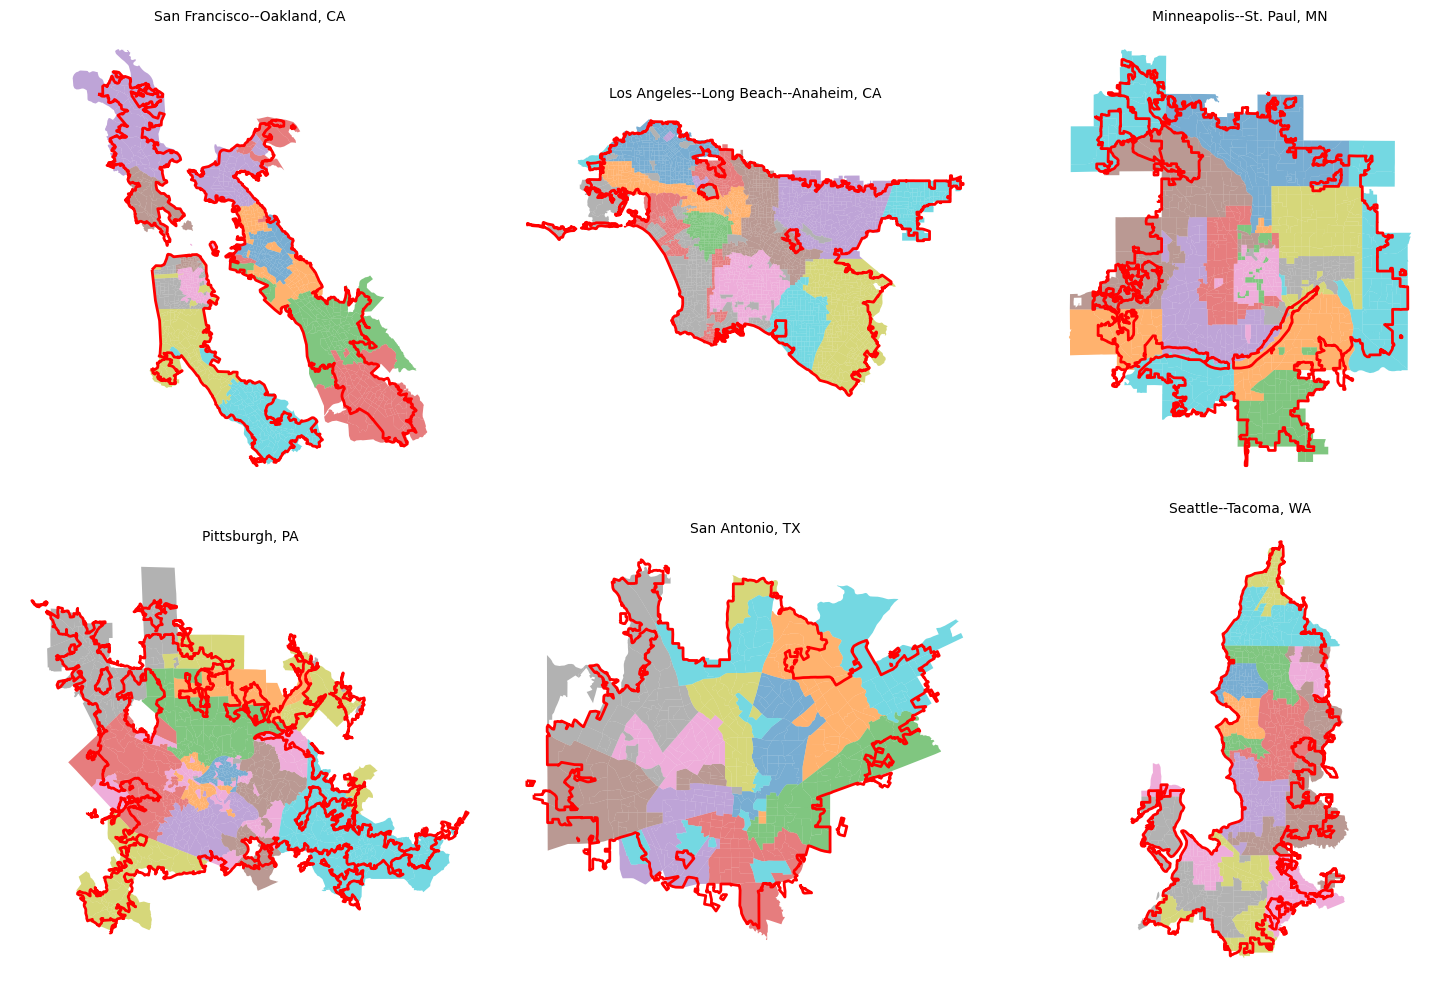

In [ ]:

tract_overlap_input = tract_overlap1_gdf
tract_overlap_input = tract_overlap2_gdf

# Unique urban area names
urban_names = tract_overlap_input['NAME20'].unique() 
n = len(urban_names)

# Define layout: adjust rows/cols based on n
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, name in enumerate(urban_names):
    ax = axes[i]
    subset = tract_overlap_input[tract_overlap_input['NAME20'] == name]
    
    subset.plot(column='GEOID', ax=ax, legend=False, alpha=0.6)
    ua_i[ua_i['NAME20'] == name].boundary.plot(ax=ax, color='red', linewidth=2)
    
    ax.set_title(f"{name}", fontsize=10)
    ax.axis('off')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.savefig('urban_area_facets2.png', dpi=300)


plt.show()
